<a href="https://colab.research.google.com/github/twishackaul/CIFAR-10-Classification/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [2]:
!pip install tensorflow==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, datasets, layers

In [4]:
import warnings
warnings.filterwarnings('ignore')

###Loading Dataset

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

50000 and 10000 training and testing input, 32*32 pixel size and 3 color channels (RGB)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

labels are in 2 dimensions bcoz of the indeces present i.e. rows and columns

In [11]:
y_train.ndim

2

In [12]:
# converting 2d to 1d

y_train = y_train.flatten()
y_test = y_test.flatten()

In [13]:
y_train.shape

(50000,)

In [14]:
y_test.shape

(10000,)

In [15]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
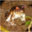

In [16]:
X_train[0]

###Data Exploration

In [17]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [18]:
def plot_image(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

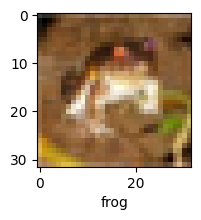

In [19]:
plot_image(X_train, y_train, 0)

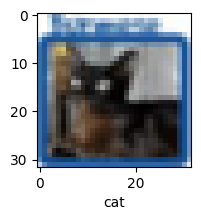

In [20]:
plot_image(X_train, y_train, 59)

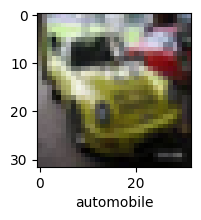

In [21]:
plot_image(X_train, y_train, 699)

###Performing normalization

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

###Building ANN model


In [24]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history = ANN.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.6704 - accuracy: 0.4114 - val_loss: 1.6312 - val_accuracy: 0.4132
Epoch 2/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.5708 - accuracy: 0.4466 - val_loss: 1.5840 - val_accuracy: 0.4311
Epoch 3/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5030 - accuracy: 0.4715 - val_loss: 1.6275 - val_accuracy: 0.4064
Epoch 4/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.4493 - accuracy: 0.4864 - val_loss: 1.4387 - val_accuracy: 0.4914
Epoch 5/5
1563/1563 [==============================] - 162s 103ms/step - loss: 1.4052 - accuracy: 0.5066 - val_loss: 1.4388 - val_accuracy: 0.4882


In [28]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.4388 - accuracy: 0.4882


[1.4388023614883423, 0.48820000886917114]

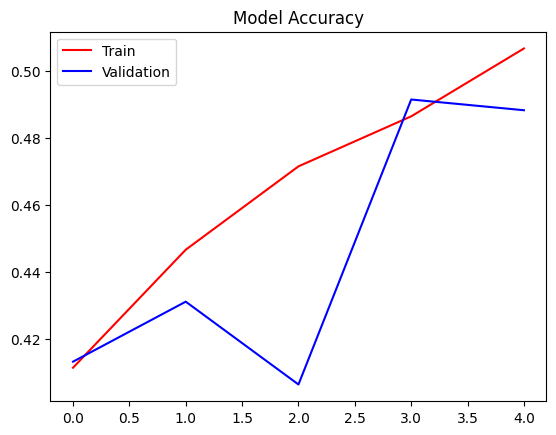

In [29]:
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

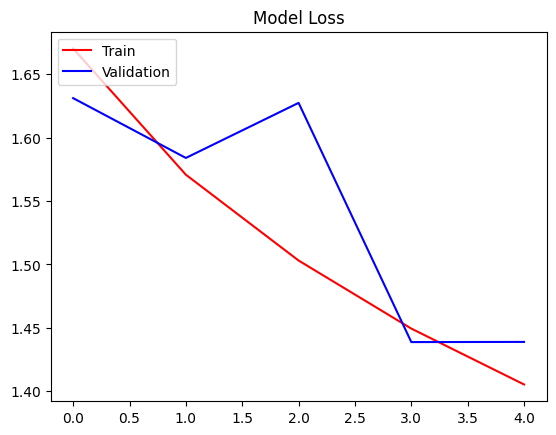

In [30]:
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [31]:
y_predA = ANN.predict(X_test)

313/313 [==============================] - 9s 28ms/step


In [32]:
y_predA[0:5]

array([[0.34981194, 0.5718432 , 0.69324446, 0.8869487 , 0.57212067,
        0.7250323 , 0.8260705 , 0.07845293, 0.5390645 , 0.0867383 ],
       [0.81981134, 0.951317  , 0.28858742, 0.2855959 , 0.26417035,
        0.07081454, 0.04262727, 0.11424572, 0.9892235 , 0.9607492 ],
       [0.94737464, 0.91827554, 0.2834723 , 0.22066994, 0.2003958 ,
        0.17010409, 0.01183767, 0.24633442, 0.98328465, 0.90835404],
       [0.7900704 , 0.69587326, 0.4778849 , 0.47297242, 0.6700735 ,
        0.29727957, 0.06535776, 0.5479919 , 0.9170353 , 0.43996155],
       [0.167095  , 0.17677096, 0.5871125 , 0.5383278 , 0.9664614 ,
        0.6676756 , 0.8791206 , 0.4560404 , 0.31334794, 0.06647467]],
      dtype=float32)

In [33]:
y_predA_new = [np.argmax(i) for i in y_predA]

In [34]:
y_predA_new[0:5]

[3, 8, 8, 8, 4]

In [35]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_predA_new)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[463,  56,  23,  22,  65,  15,  55,  28, 221,  52],
       [ 13, 687,   1,  14,  18,  12,  17,  31,  87, 120],
       [ 59,  36, 133,  79, 264,  85, 206,  72,  43,  23],
       [ 16,  44,  21, 246, 109, 200, 209,  59,  33,  63],
       [ 31,  22,  28,  43, 511,  40, 190,  79,  38,  18],
       [ 10,  27,  24, 144, 119, 365, 139,  89,  43,  40],
       [  2,  38,   9,  38, 118,  37, 692,  29,  19,  18],
       [ 15,  32,  14,  56, 114,  54,  62, 537,  26,  90],
       [ 45,  79,   6,  15,  33,  21,  19,  13, 717,  52],
       [ 13, 247,   2,  23,  11,  16,  29,  33,  95, 531]], dtype=int32)>

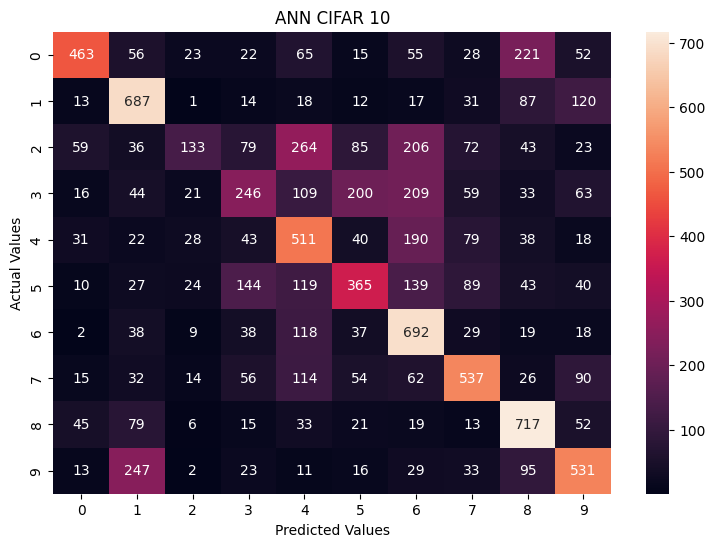

In [37]:
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN CIFAR 10')
plt.show()

##Building CNN Model

In [38]:
CNN = models.Sequential([

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

In [39]:
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
history = CNN.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5025 - accuracy: 0.4569 - val_loss: 1.2621 - val_accuracy: 0.5614
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1411 - accuracy: 0.6022 - val_loss: 1.1367 - val_accuracy: 0.6065
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0101 - accuracy: 0.6503 - val_loss: 0.9864 - val_accuracy: 0.6607
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9262 - accuracy: 0.6797 - val_loss: 0.9651 - val_accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8632 - accuracy: 0.7008 - val_loss: 0.9271 - val_accuracy: 0.6766
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8113 - accuracy: 0.7202 - val_loss: 0.9280 - val_accuracy: 0.6787
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7659 - accuracy: 0.7346 - val_loss: 0.9324 -

In [41]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9449 - accuracy: 0.6875


[0.9449167251586914, 0.6875]

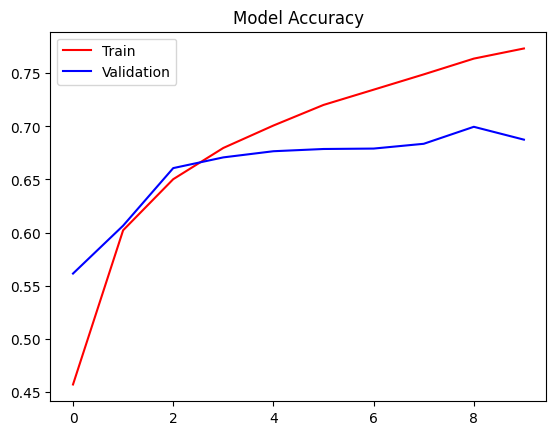

In [42]:
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

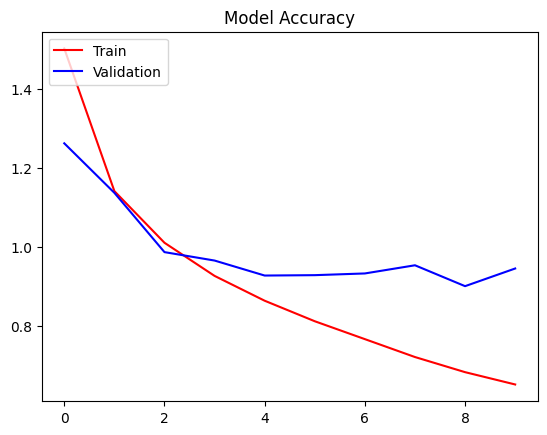

In [43]:
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [44]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [45]:
y_pred[0:5]

array([[1.29606854e-03, 1.67311006e-03, 1.28347334e-03, 8.48216116e-01,
        5.83254208e-04, 1.22287229e-01, 9.49178170e-03, 2.67403520e-04,
        1.47627508e-02, 1.38776348e-04],
       [8.03602452e-05, 5.42560779e-02, 4.27565919e-06, 4.79390962e-07,
        4.04478548e-08, 4.35797443e-09, 3.20803046e-08, 1.97427297e-09,
        9.44993377e-01, 6.65263855e-04],
       [5.55197932e-02, 9.39620733e-02, 7.44011439e-03, 1.13494722e-02,
        4.48279921e-03, 2.91222380e-03, 1.86042592e-03, 1.26763359e-02,
        7.45139778e-01, 6.46571070e-02],
       [3.57497215e-01, 1.20298360e-02, 9.72091407e-03, 2.41033249e-02,
        2.43196986e-03, 2.75048165e-04, 1.27076951e-03, 5.27304792e-06,
        5.92117548e-01, 5.48091484e-04],
       [2.37964705e-05, 8.73963872e-05, 2.63822023e-02, 1.67756118e-02,
        5.67051768e-01, 5.63051132e-03, 3.83827329e-01, 1.22276997e-05,
        1.07179192e-04, 1.02123544e-04]], dtype=float32)

In [46]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [47]:
y_pred_new[0:5]

[3, 8, 8, 8, 4]

In [48]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [49]:
CM_CNN = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM_CNN

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[602,  15, 102,  22,  48,   3,   7,   8, 144,  49],
       [  9, 793,  14,   9,   4,   5,   4,   5,  46, 111],
       [ 33,   6, 631,  51, 102,  61,  56,  24,  25,  11],
       [  7,  12, 112, 492,  88, 143,  66,  34,  25,  21],
       [ 10,   4,  99,  53, 676,  28,  51,  55,  20,   4],
       [  7,   7,  81, 177,  58, 572,  24,  47,  13,  14],
       [  2,   8,  69,  68,  38,  22, 768,   7,  10,   8],
       [  9,   2,  58,  53,  87,  70,   6, 688,   6,  21],
       [ 28,  24,  18,  13,  11,   2,   1,   6, 857,  40],
       [ 21,  76,  19,  14,  11,   6,   7,   6,  44, 796]], dtype=int32)>

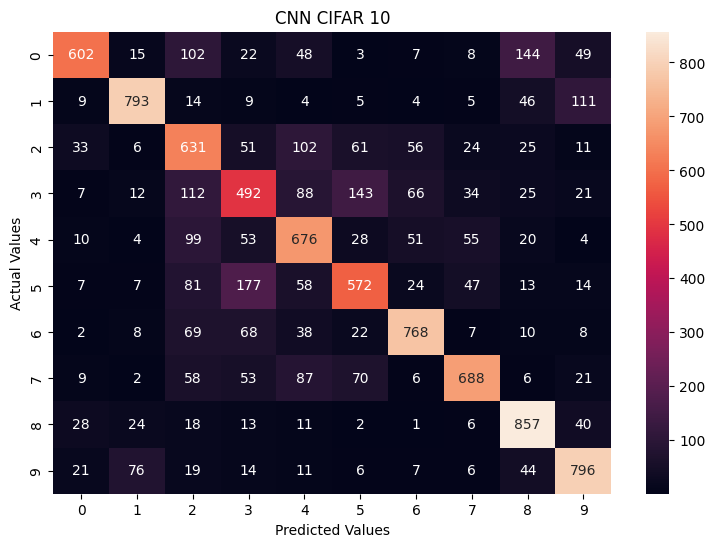

In [50]:
plt.figure(figsize = (9,6))
sns.heatmap(CM_CNN, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('CNN CIFAR 10')
plt.show()

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1000
           1       0.84      0.79      0.81      1000
           2       0.52      0.63      0.57      1000
           3       0.52      0.49      0.50      1000
           4       0.60      0.68      0.64      1000
           5       0.63      0.57      0.60      1000
           6       0.78      0.77      0.77      1000
           7       0.78      0.69      0.73      1000
           8       0.72      0.86      0.78      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [53]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               